<a href="https://colab.research.google.com/github/rafsantos/tcc_colab_py/blob/main/Matriz%20Pintar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# @title Ferramentas
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import requests

#Desenha grade em uma imagem com um determinado intervalo
def grade(img,intervalo):
  img = np.array(img)
  img[::intervalo] = 0
  img[:,::intervalo] = 0
  img = Image.fromarray(img.astype('uint8'),'L')
  return img

def leImagemWeb(url):
  im = Image.open(requests.get(url, stream=True).raw).convert('L')
  return im

#pixelando imagem
def ajustaVisual(img,pixH,fator):
  #compacta primeiro
  img = encolhe(img,pixH)
  img = img.resize((img.size[0]*fator,img.size[1]*fator),resample=Image.NEAREST)
  return img

#Reduz imagem para quantidade de pixels na horizontal
def encolhe(img,pixH):
  img = img.resize((pixH,int(pixH*img.height/img.width)),resample=Image.NEAREST)
  return img

# Escreve os pixels por cima da imagem ajustada a fator
def escrevePixels(img,fator):
  draw = ImageDraw.Draw(img)
  #font = ImageFont.load_default()
  font = ImageFont.truetype("Arial.ttf", fontsize)
  img_arr = np.transpose(np.array(img))
  for y in range(0,img_arr.shape[1],fator):
    for x in range(0,img_arr.shape[0],fator):
      txt = str((img_arr)[x,y])
      txtbox = font.getbbox(txt)
      #Alinhando o texto no centro do quadrado
      #draw.text((x + fator/2 - txtbox[2]/2, y + fator/2 - txtbox[3]/2 ), txt, anchor='mm', font = font)
      draw.text((x + fator/2, y + fator/2 ), txt, anchor='mm', font = font, stroke_width=1)
  return img

# Escreve os pixels por cima da imagem ajustada a fator
# Saida: imagem em branco com Pixels
def escrevePixelsSemImagem(img,fator):
  img_out = Image.new(mode="L", size=(img.size[0],img.size[1]),color = (255))
  draw = ImageDraw.Draw(img_out)
  #font = ImageFont.load_default()
  font = ImageFont.truetype("Arial.ttf", fontsize)
  img_arr = np.transpose(np.array(img))
  for y in range(0,img_arr.shape[1],fator):
    for x in range(0,img_arr.shape[0],fator):
      txt = str((img_arr)[x,y])
      txtbox = font.getbbox(txt)
      #Alinhando o texto no centro do quadrado
      #draw.text((x + fator/2 - txtbox[2]/2, y + fator/2 - txtbox[3]/2 ), txt, anchor='mm', font = font)
      draw.text((x + fator/2, y + fator/2 ), txt, anchor='mm', font = font, stroke_width=1)
  return img_out


In [31]:
##################################################
# Ajustes no tamanho da imagem
fator = 80  # Tamanho de cada quadrado
pixHoriz = 20 # Numero de quadrados
fontsize = 30  # Tamanho da fonte
numCores = 3
##################################################

# Vou obter uma imagem da web

#Mario
url = "https://p.turbosquid.com/ts-thumb/DK/rVqefa/IdB4aZrN/0/jpg/1408568906/600x600/fit_q87/a2fc0eb49b241e273ed52dec1bd7d3cf63548f8c/0.jpg"

#Cogumelo
#url = "https://a0.anyrgb.com/pngimg/2036/1996/super-mushroom-8-bit-duck-hunt-super-mario-maker-super-mario-bros-8bit-super-mario-world-super-mario-bros-toad-mushroom.png"

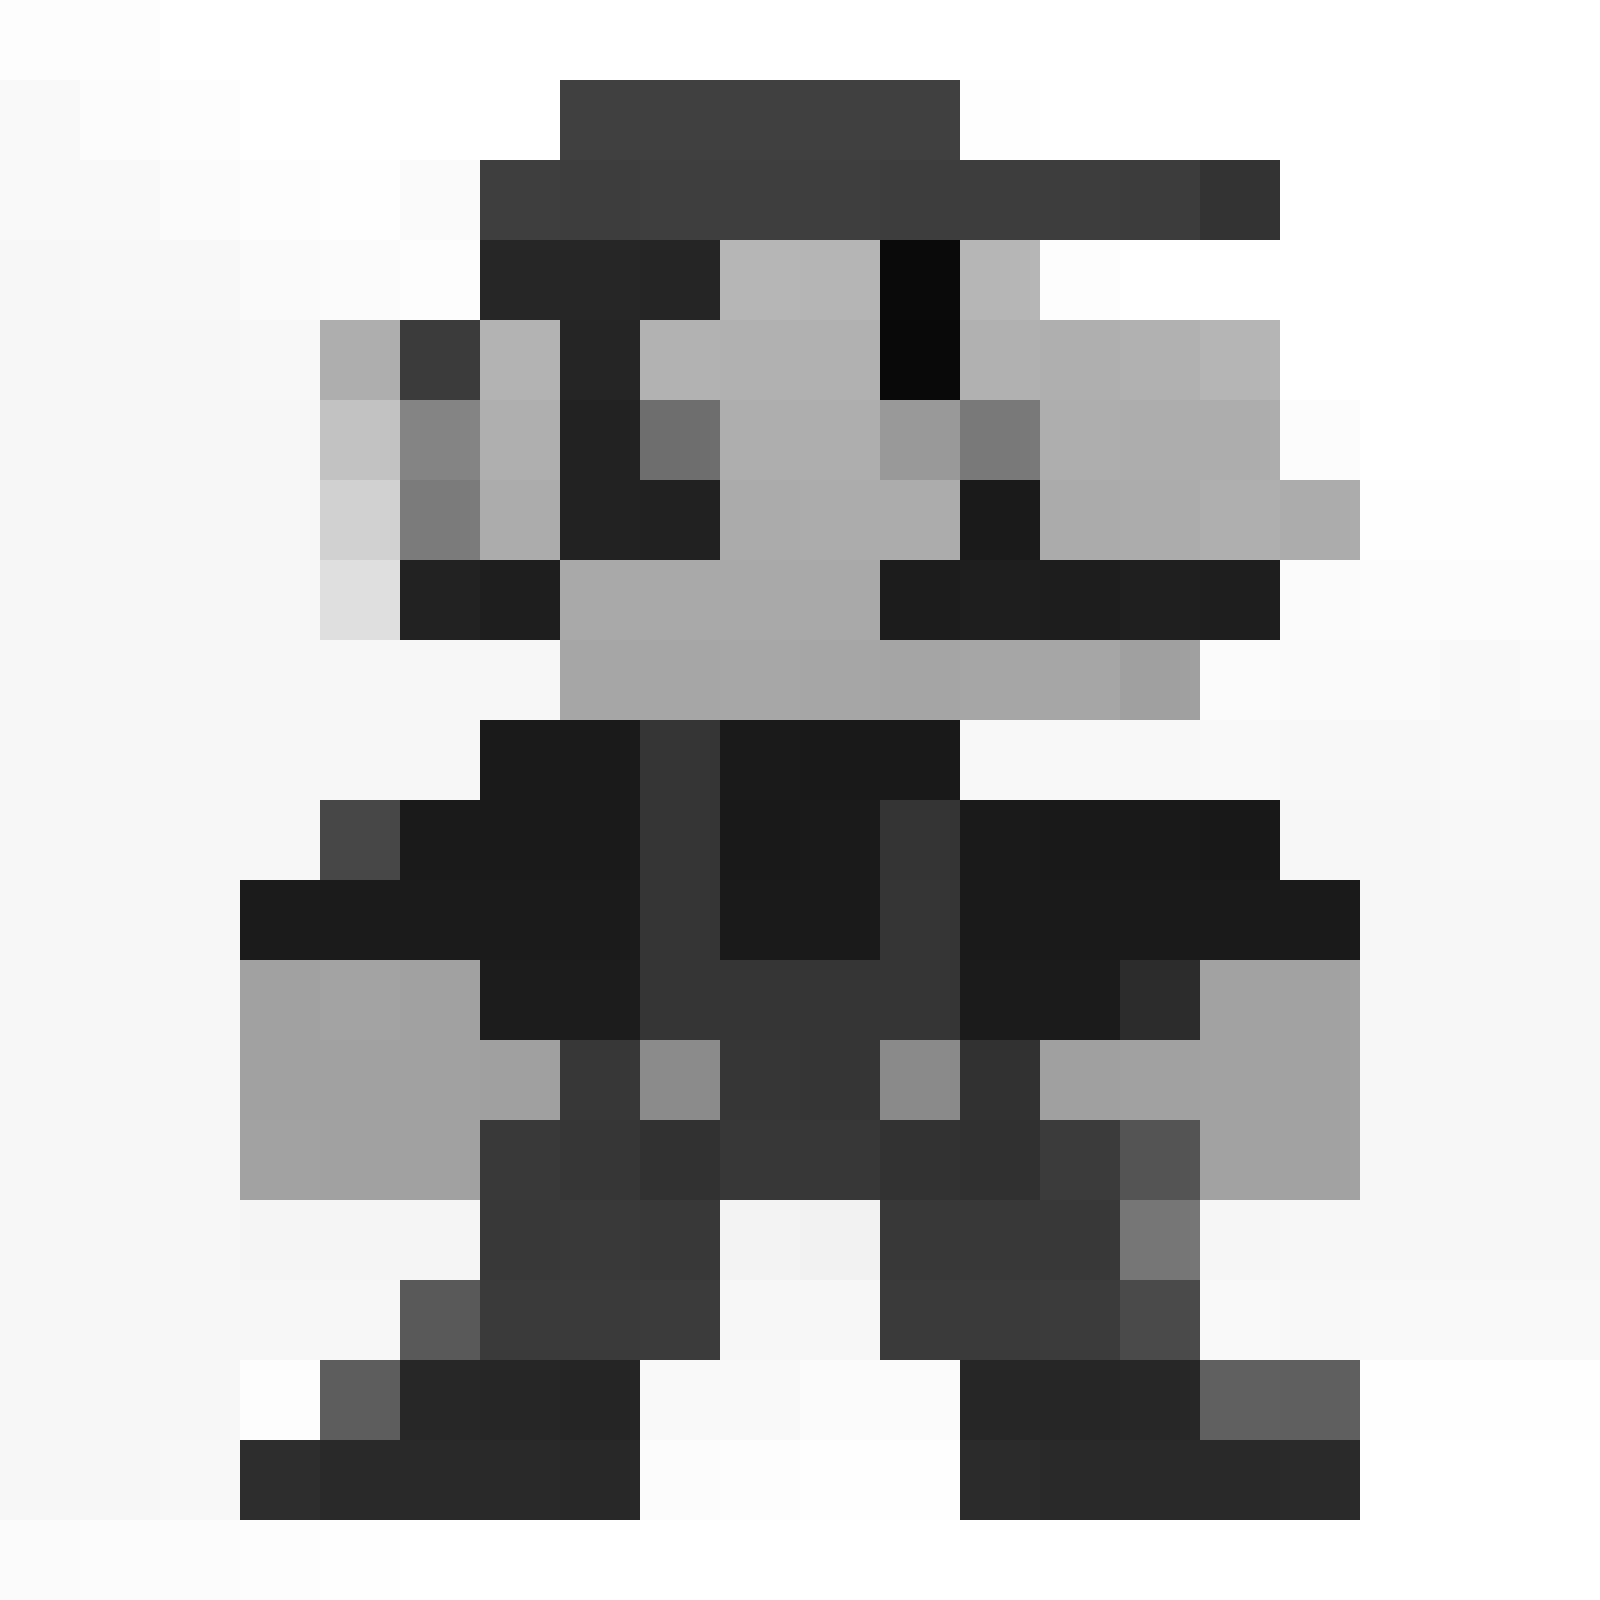

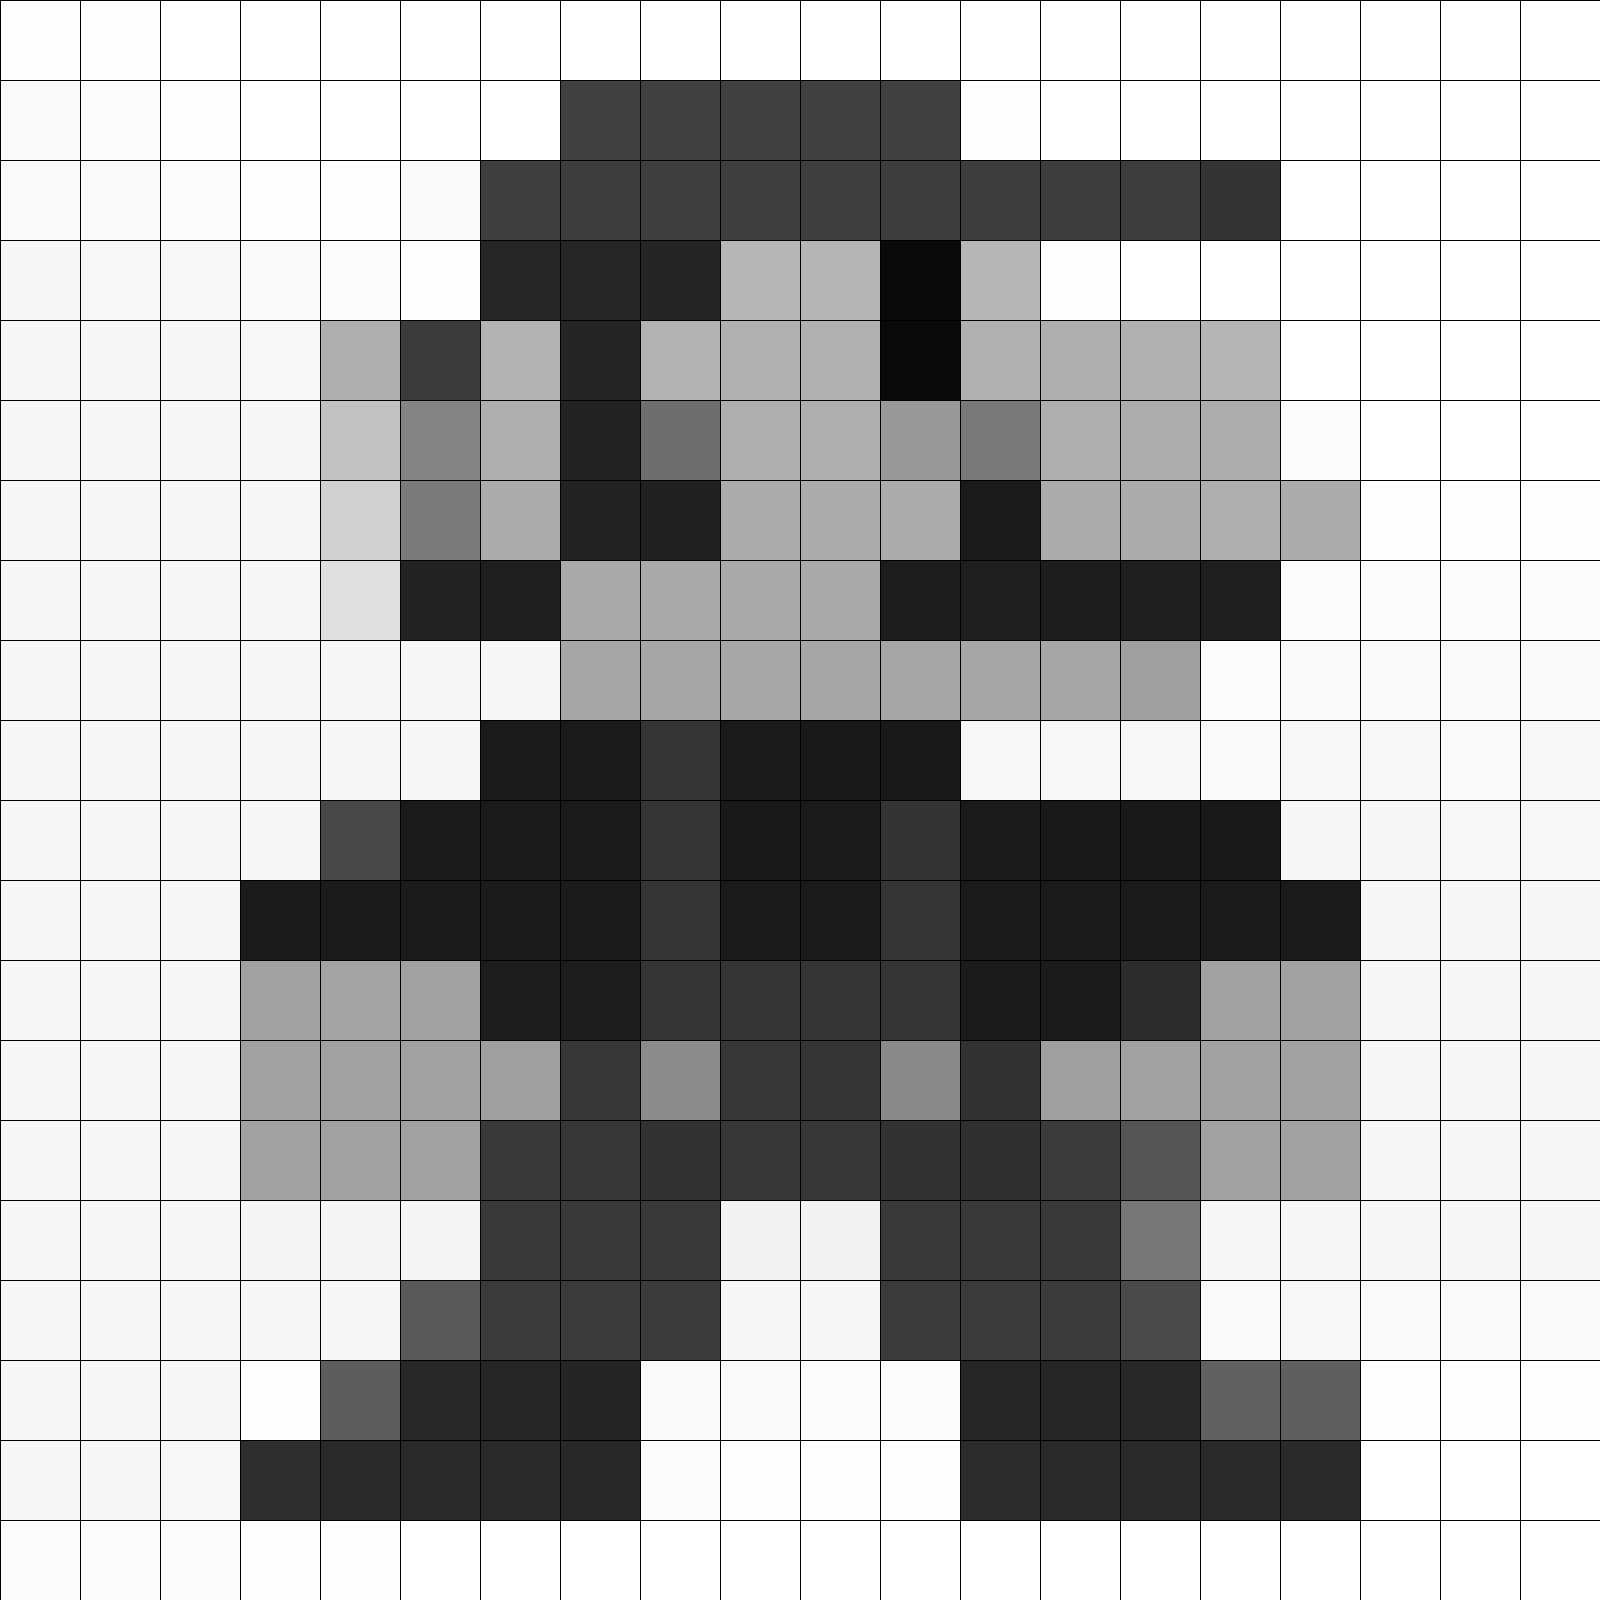

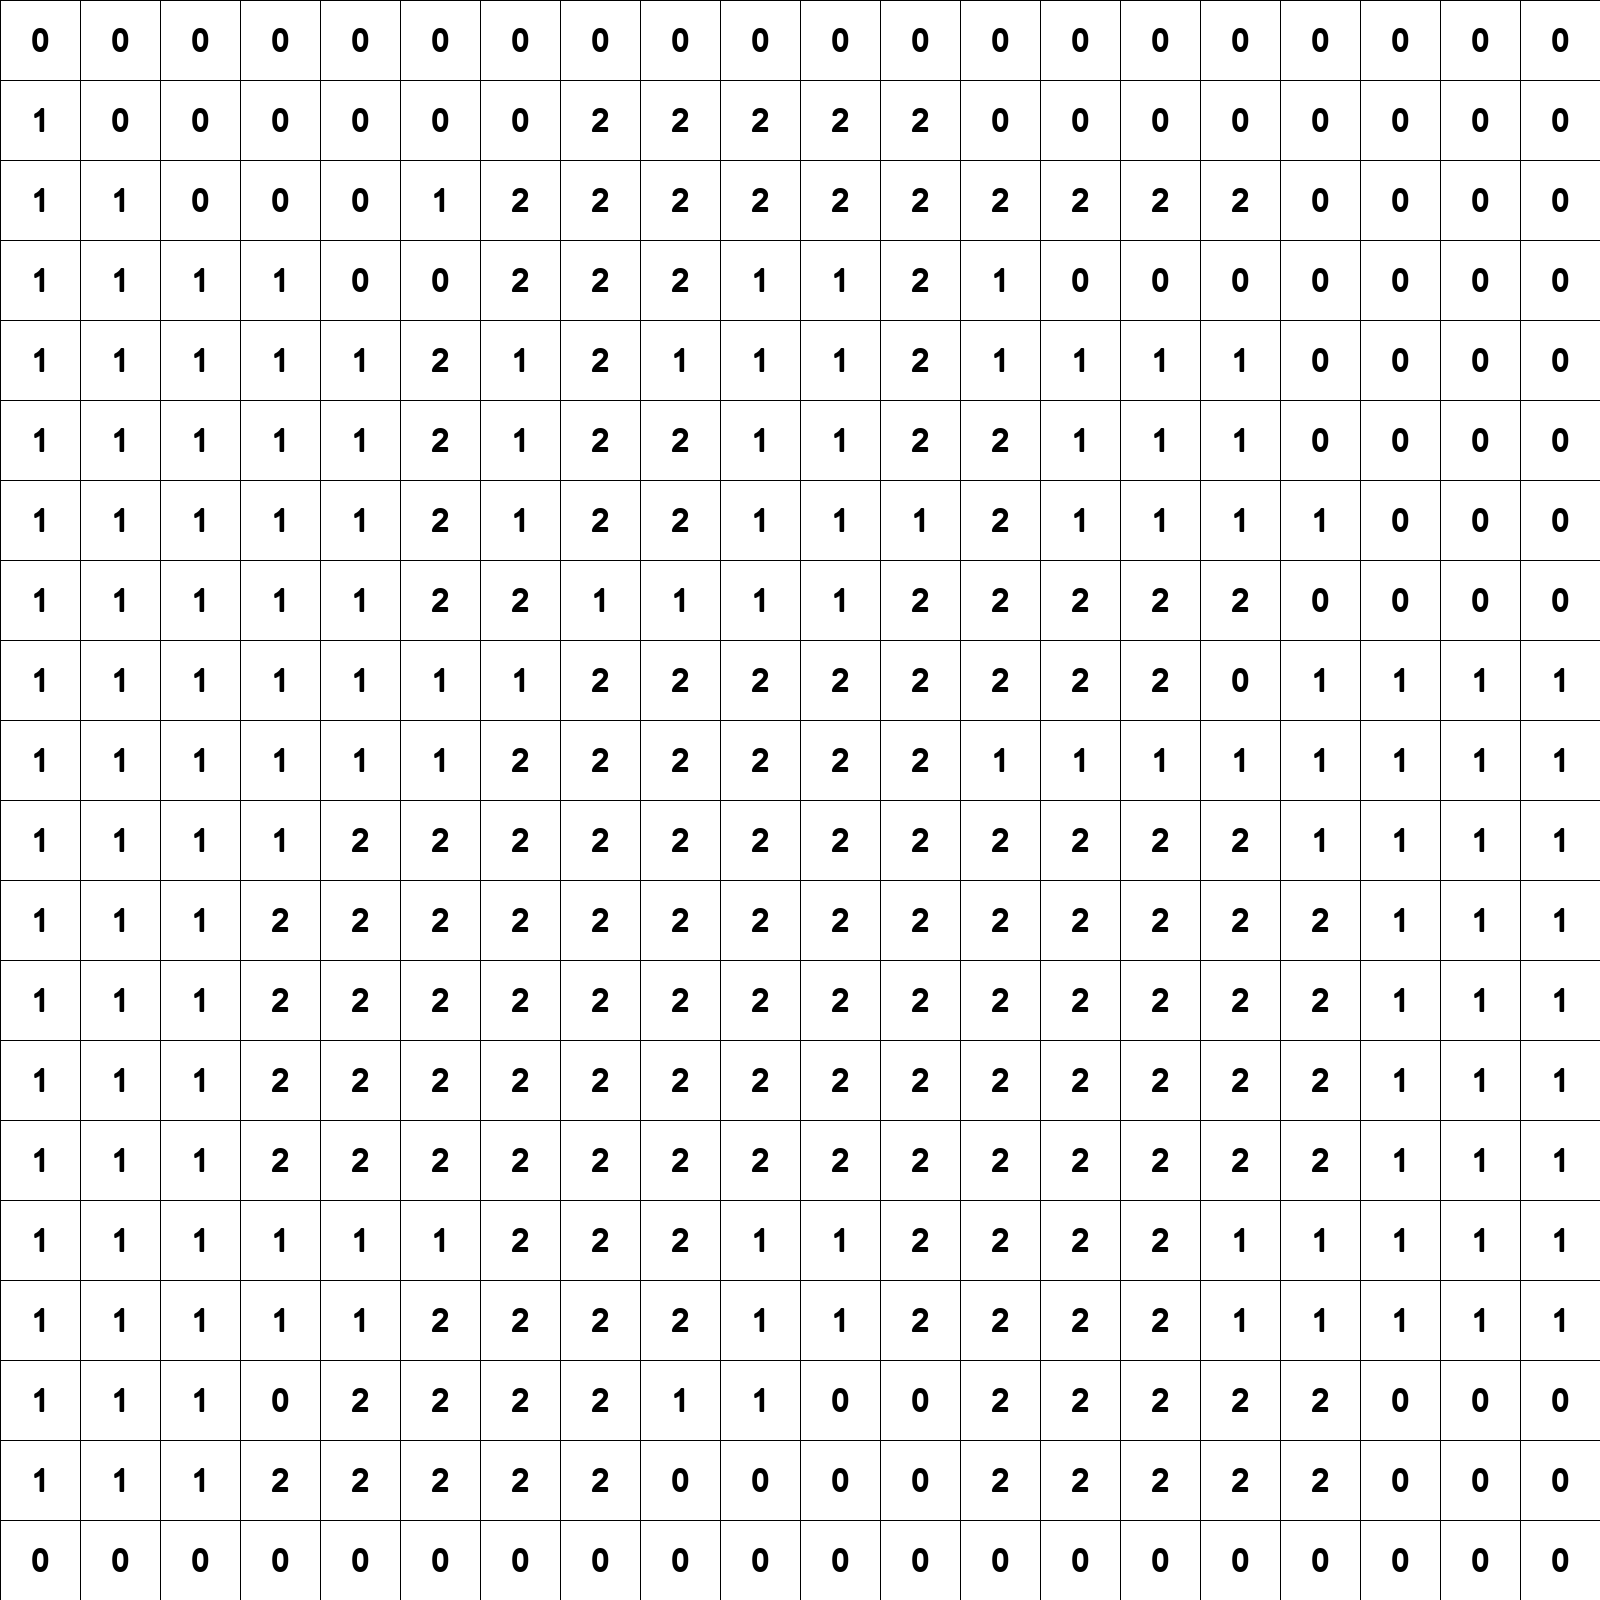

In [32]:
img = leImagemWeb(url)
img = ajustaVisual(img,pixHoriz,fator)
img = img.convert("L")
#imprime imagem de entrada em preto e branco
display(img)
img = img.quantize(colors=numCores, dither=None)

#Imagem com grade
img = leImagemWeb(url)
img = ajustaVisual(img,pixHoriz,fator)
img = grade(img,fator)
display(img)

#Imagem pra pintar
img = img.quantize(colors=numCores, dither=None)
img = ajustaVisual(img,pixHoriz,fator)
img = escrevePixelsSemImagem(img,fator)
img = grade(img,fator)
display(img)


